In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ¿Que es una distribución? 

Una distribución es una función que muestra los posibles valores de una variable y la probabilidad de que se produzcan.

## Tipos de distribuciones

**Exponencial**

In [4]:
#Explicación

In [ ]:
#code (Muestra grafica)

**Poisson**

In [ ]:
#Explicación

In [ ]:
#code (Muestra grafica)

**Normal**

In [ ]:
#Explicación

C:\Users\mituc\anaconda3\envs\py39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

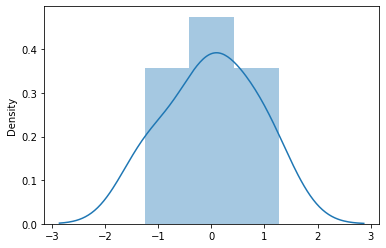

In [14]:
sns.distplot(np.random.normal(0,1,10))
plt.show

**Escala logaritmica**

In [ ]:
#Una escala logaritmica es

In [ ]:
#code (Muestra grafica)